## Please first install these libraries
pip install pythreejs pyntcloud pandas numpy

In [2]:
from pyntcloud import PyntCloud
import pandas as pd
import os
import numpy as np
import PIL.Image as Image
%matplotlib inline

In [3]:
def load_velo_scan(velo_filename):
    scan = np.fromfile(velo_filename, dtype=np.float32)
    scan = scan.reshape((-1, 4))
    return scan

In [4]:
def paint_points(points, color=[192,0,0]):
    # color = [r, g, b]
    color = np.array([color])
    new_pts = np.zeros([points.shape[0],6])
    new_pts[:,:3] = points
    new_pts[:, 3:] = new_pts[:, 3:] + color
    return new_pts

In [12]:
path = '../result/pseudo-lidar_velodyne/000000.bin'
#path = './000000_10.bin'

In [13]:
points = load_velo_scan(path)[:,:3]

In [14]:
pd_points = pd.DataFrame(paint_points(points), columns=['x','y','z','red','green','blue'])

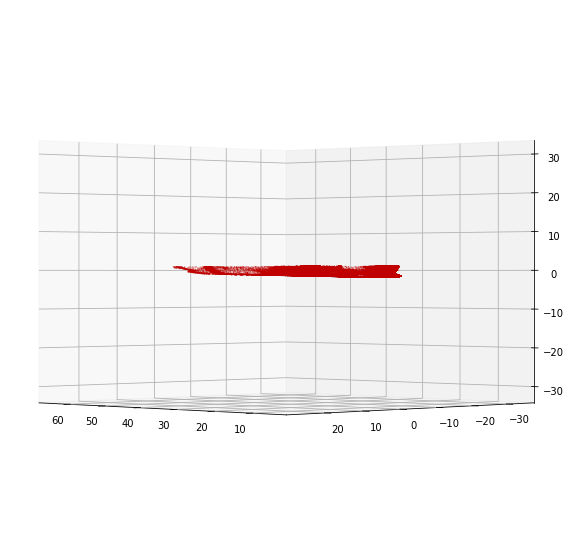

In [15]:
cloud = PyntCloud(pd_points)
#cloud.plot(use_as_color="x",initial_point_size=0.02)
cloud.plot(backend="matplotlib",width = 800, height = 800,elev= 0, azim = 135, initial_point_size=0.02)

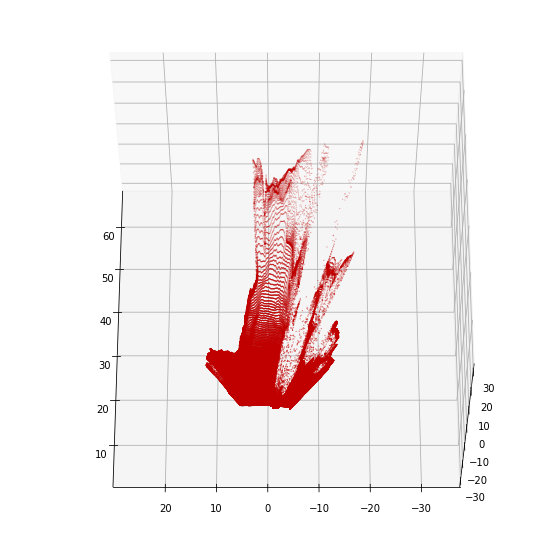

In [16]:
cloud.plot(backend="matplotlib",width = 800, height = 800,elev= 60, azim = 180, initial_point_size=0.02)

In [9]:
cloud.plot(backend="pythreejs",initial_point_size=0.02)

g:\venv\lib\site-packages\pythreejs\traits.py:191: UserWarning: 64-bit data types not supported for WebGL data, casting to 32-bit.
  warnings.warn('64-bit data types not supported for WebGL '


Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(7.087497216532655, 330.3217120142679, 0.8695…

## The expected interface is shown bellow. If you cannot get it, please reopen your web browser.

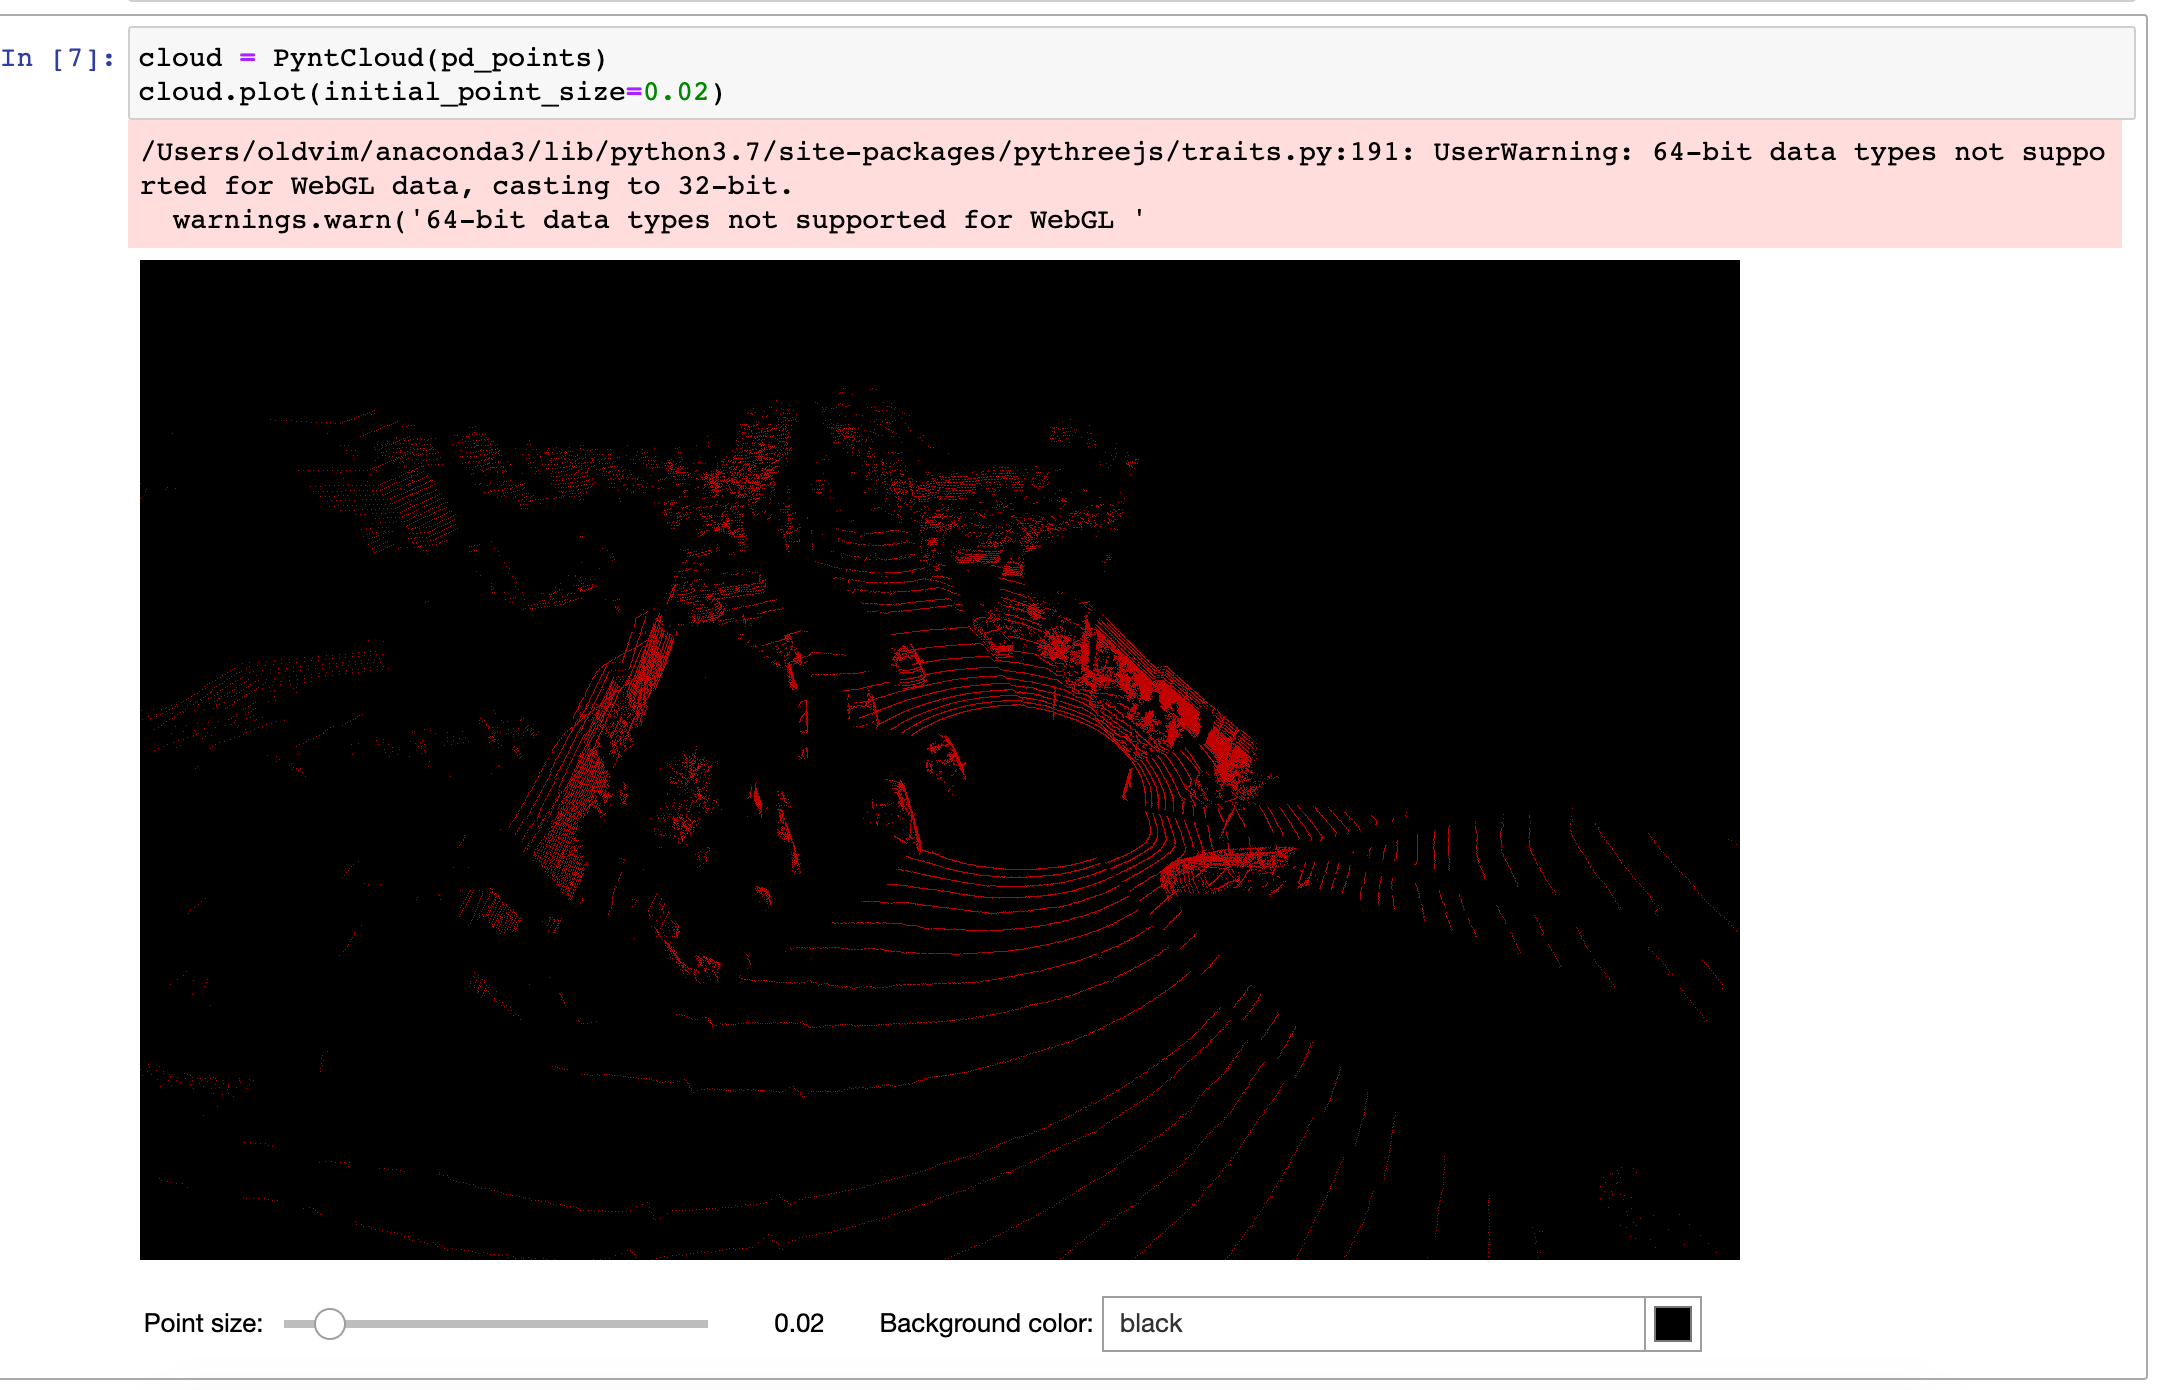

In [9]:
Image.open('./pyntcloud.png')